In [4]:
# Dataset Overview
# Data Cleaning
# EDA (Visualizations)
# Insights Summary

import pandas as pd

df = pd.read_csv("data/Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
## 1. Basic Info
- shape
- columns
- data types
- missing values

## 2. Numerical Overview
- describe()
- distributions

## 3. Categorical Overview
- value_counts()
- unique()

## 4. Cleaning
- handle missing Age
- drop irrelevant columns
- convert categories

## 5. Exploration
- Survival by gender
- Survival by passenger class
- Visualization: bar charts / histograms / boxplots

## 6. Insights
- patterns
- hypotheses
- questions


SyntaxError: invalid syntax (1535888185.py, line 4)

In [ ]:
df.shape


(891, 12)

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#missing values
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#basic stats
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


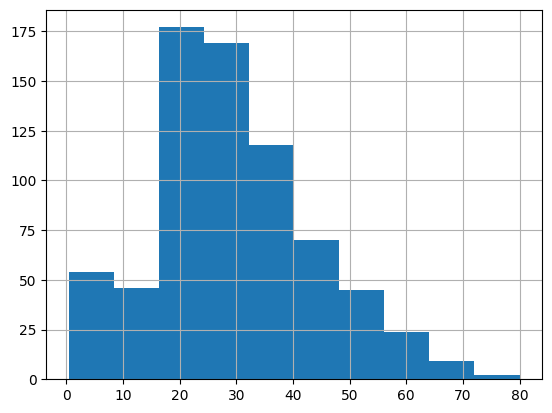

In [11]:
#visualize

import matplotlib.pyplot as plt

df['Age'].hist()
plt.show()


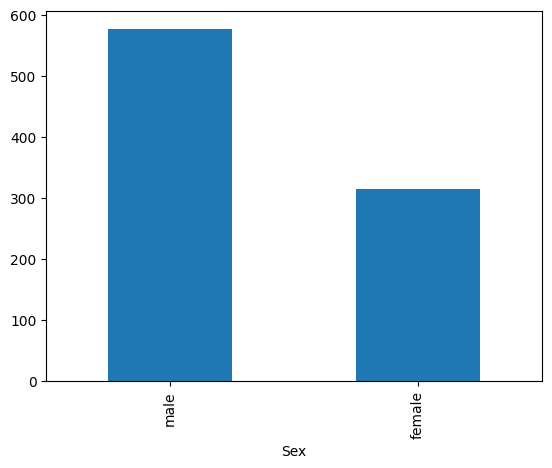

In [ ]:
df['Sex'].value_counts().plot(kind='bar')
plt.show()


In [ ]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
df['Survived'].mean()

np.float64(0.3838383838383838)

In [ ]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

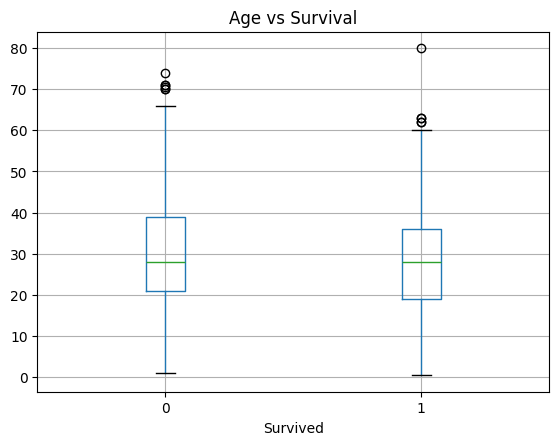

In [12]:
df.boxplot(column='Age', by='Survived')
plt.title('Age vs Survival')
plt.suptitle('')
plt.show()


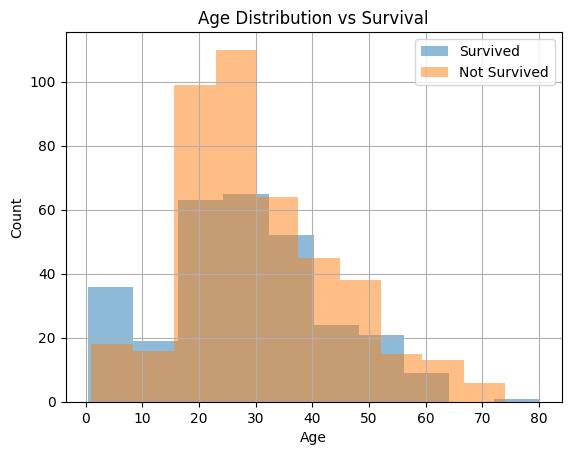

In [ ]:
df[df['Survived']==1]['Age'].hist(alpha=0.5)
df[df['Survived']==0]['Age'].hist(alpha=0.5)
plt.legend(['Survived','Not Survived'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution vs Survival')
plt.show()


In [ ]:
missing_df = pd.DataFrame({
    'Missing Count': df.isna().sum(),
    'Missing %': (df.isna().mean() * 100).round(2)
})

missing_df.sort_values('Missing %', ascending=False)


,Missing Count,Missing %
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Name,0,0.00
Pclass,0,0.00
Survived,0,0.00
Sex,0,0.00
Parch,0,0.00
SibSp,0,0.00


In [ ]:
## Key Insights

1. 38% of passengers survived overall.
2. Females had significantly higher survival.
3. Passengers in 1st class survived at higher rates.
4. Younger passengers had higher chance of survival. 
5. Age has the highest missing rate (~19%).
6. Cabin is ~77% missing; likely drop this column.
7. Embarked has minor missing entries (<1%).


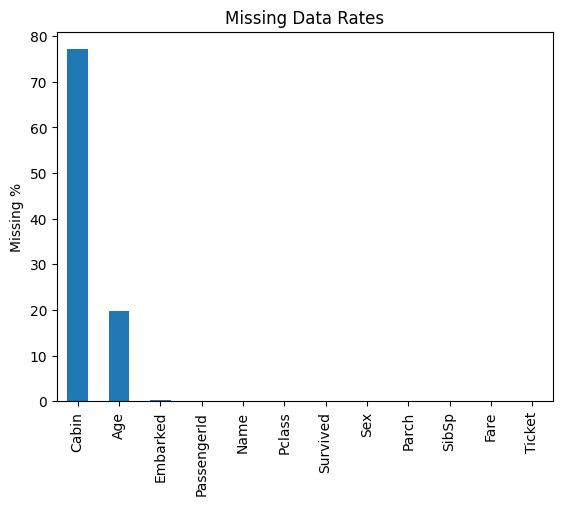

In [ ]:
(df.isna().mean() * 100).sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Missing %')
plt.title('Missing Data Rates')
plt.show()


In [8]:
# define age bins
bins = [0, 12, 18, 30, 50, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

df.groupby(['Sex', 'AgeGroup'])['Survived'].mean()


C:\Users\cyan\AppData\Local\Temp\ipykernel_9396\1842823428.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Sex', 'AgeGroup'])['Survived'].mean()


Sex     AgeGroup   
female  Child          0.593750
        Teen           0.750000
        Young Adult    0.755556
        Adult          0.779070
        Senior         0.941176
male    Child          0.567568
        Teen           0.088235
        Young Adult    0.155556
        Adult          0.225806
        Senior         0.127660
Name: Survived, dtype: float64

In [7]:
df['FareBin'] = pd.qcut(df['Fare'], q=4)
df.groupby('FareBin')['Survived'].mean()


C:\Users\cyan\AppData\Local\Temp\ipykernel_9396\3031399563.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('FareBin')['Survived'].mean()


FareBin
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

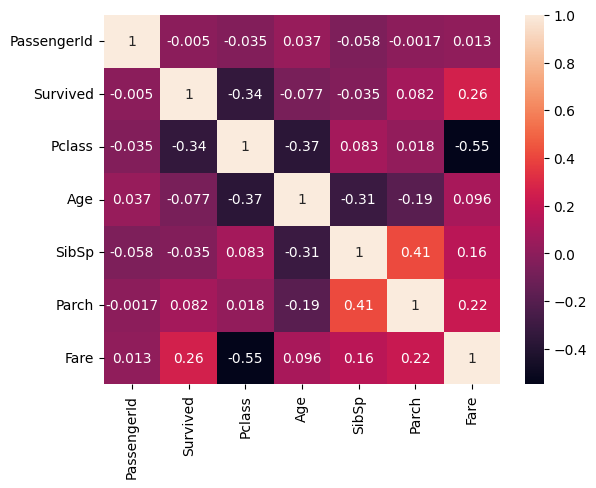

In [13]:
import seaborn as sns

num_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(num_df.corr(), annot=True)
plt.show()



In [14]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.groupby('FamilySize')['Survived'].mean()


FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64